## Part 1:- Data PreProcessing

## Importing the libraries and the datasets

DataSet Link :- https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
car_data = pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Exploration

In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Categorical Types
car_data.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
#Numerical Types
car_data.select_dtypes(include=['int64', 'float64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Dealing with missing values

In [ ]:
car_data.isnull().values.any()

False

## Restructre the datasets

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.drop(columns='Car_Name', inplace=True)

In [ ]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data['Car Used for (In years)'] = 2021 - car_data['Year']

In [ ]:
car_data.drop(columns='Year', inplace=True)

In [ ]:
car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car Used for (In years)
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Encoding the Categorical Data

In [ ]:
car_data.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
car_data['Fuel_Type'].nunique()

3

In [ ]:
car_data['Seller_Type'].nunique()

2

In [ ]:
car_data['Transmission'].nunique()

2

In [ ]:
#one-hot encoding
car_data_refined = pd.get_dummies(data = car_data, drop_first=True)

In [ ]:
car_data_refined.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Used for (In years),Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [ ]:
car_data_refined.shape

(301, 9)

## Correlation Matrix

In [ ]:
car_data_refined_1 = car_data_refined.drop(columns='Selling_Price')

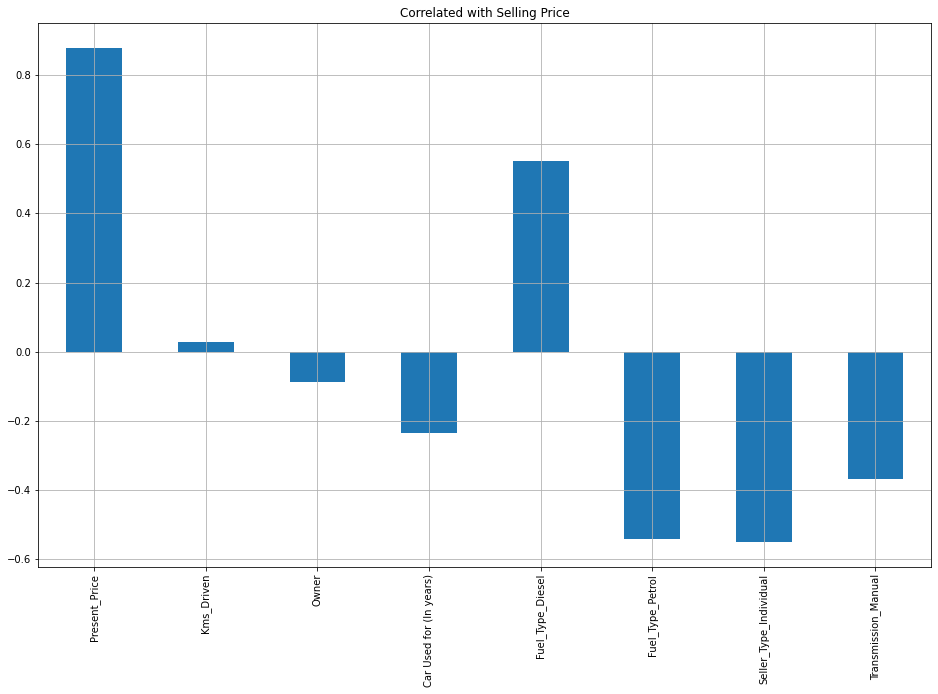

In [ ]:
car_data_refined_1.corrwith(car_data_refined['Selling_Price']).plot.bar(figsize=(16,10), title='Correlated with Selling Price', grid=True)

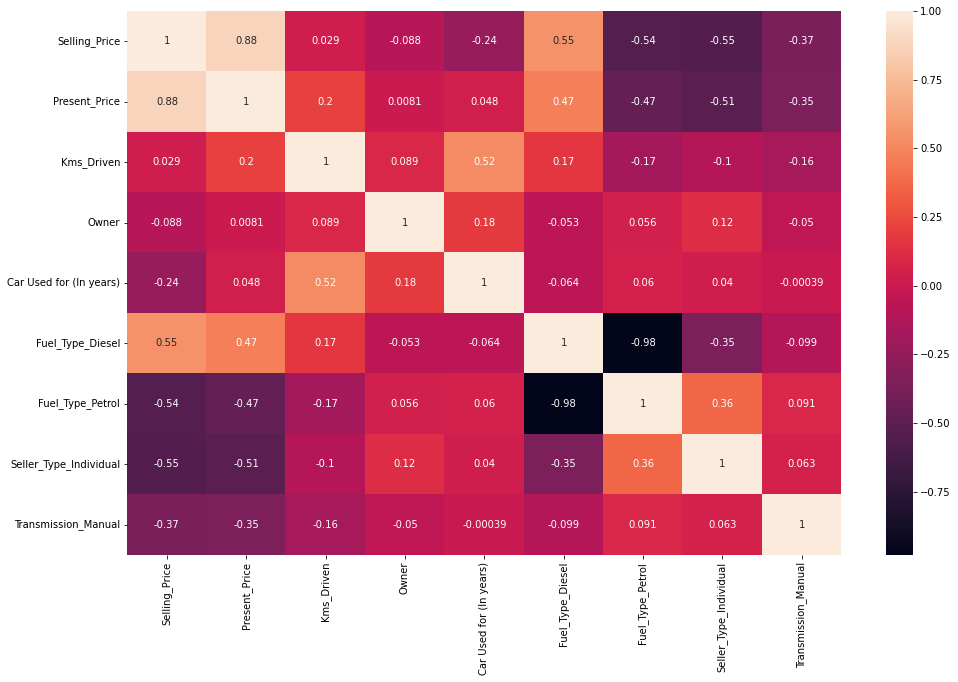

In [ ]:
corr = car_data_refined.corr()
plt.figure(figsize =(16,10))
sns.heatmap(corr, annot=True)

## Splitting the DataSet

In [ ]:
car_data_refined.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Used for (In years),Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [ ]:
#Matrix of feature
x= car_data_refined.drop(columns='Selling_Price')

In [ ]:
#Target Variable
y = car_data_refined['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(240, 8)

In [ ]:
y_train.shape

(240,)

In [ ]:
x_test.shape

(61, 8)

In [ ]:
y_test.shape

(61,)

## Feature Scaling

## Building the model

# 1) Multiple-Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression_mlr = LinearRegression()
regression_mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regression_mlr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.9144342972228519

## 2) Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regression_rf = RandomForestRegressor()
regression_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regression_rf.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.956462546184383

## Find the optimal parameters using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
    'criterion':['mse', 'mae'],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10,20,50],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['auto', 'sqrt', 'log2']
}

In [ ]:
parameters

{'criterion': ['mse', 'mae'],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 20, 50],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [ ]:
random_cv = RandomizedSearchCV(estimator=regression_rf, param_distributions=parameters, n_iter=10, scoring='neg_mean_absolute_error', cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=2,
                      min_samples_split=5)

In [ ]:
random_cv.best_score_

-0.6919487463728401

In [ ]:
random_cv.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

## Final Model(Random Forest Regression)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=2,
                      min_samples_split=5)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=2,
                      min_samples_split=5)

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9505088370083152

## Predicting a single observation

In [ ]:
single_obs = [[9.85,6900,0,4,0,1,0,1]]

In [ ]:
regressor.predict(single_obs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([8.15013425])

In [ ]:
car_data_refined.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car Used for (In years),Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
